In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from scipy.io import wavfile as wav
from keras.models import load_model
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
audio1= "D:/Joy/Research_Joy/Music_Research/all_dataset/8s_clips/Karaharapriya_1.wav"

In [3]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

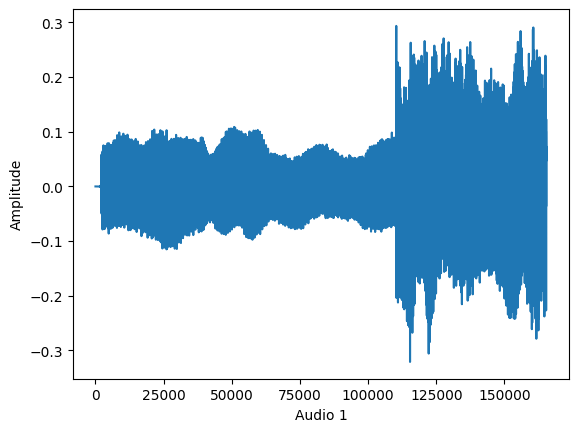

In [4]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [5]:
wavesr2, wave_audio=wav.read(audio1)

In [6]:
wavesr2

44100

In [7]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-1134,  -825],
       [-1291,  -830],
       [-1470,  -875]], dtype=int16)

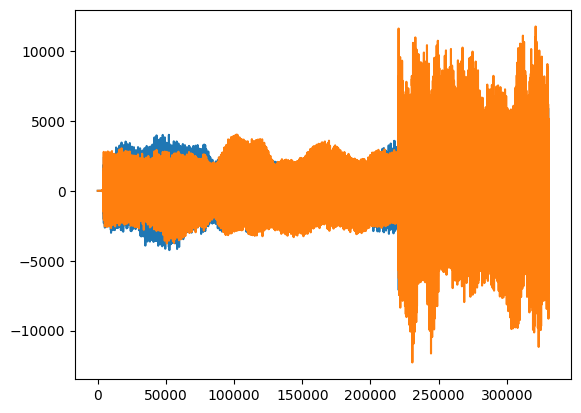

In [8]:
plt.plot(wave_audio)
plt.show()

In [9]:

folder_path = 'D:/Joy/Research_Joy/Music_Research/all_dataset/8s_clips'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Extract the text before '_' for each file name
raga_name = [name.split('_')[0] for name in file_names]

print(raga_name)

['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriy

In [10]:
print(file_names[:5])
print(raga_name[:5])

['Karaharapriya_1.wav', 'Karaharapriya_10.wav', 'Karaharapriya_100.wav', 'Karaharapriya_1000.wav', 'Karaharapriya_1001.wav']
['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya']


In [11]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

In [12]:
extracted_features = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([features, file_name.split('_')[0]])
print(extracted_features)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

,feature,class
0,"[-292.65964, 152.12662, 6.426648, 28.62913, -2...",Karaharapriya
1,"[-175.41248, 130.74937, -28.549292, 60.119263,...",Karaharapriya
2,"[-116.561714, 89.27022, -9.892668, 50.196297, ...",Karaharapriya
3,"[-185.1901, 93.41532, -16.745422, 33.356224, -...",Karaharapriya
4,"[-137.73885, 78.85138, -18.318651, 13.747601, ...",Karaharapriya


In [14]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [15]:
y.shape

(10012, 5)

In [16]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Karaharapriya' 'Keeravani' 'Sarasangi' 'Shanmugapriya' 'Thodi']
Encoded labels:  [0 1 2 3 4]


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [18]:
X_train.shape

(8009, 40)

In [19]:
y_train.shape

(8009, 5)

In [20]:
X_train.shape

(8009, 40)

In [21]:
y_test.shape

(2003, 5)

In [22]:
num_labels = y.shape[1]
print(num_labels)

5


In [23]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])


In [24]:
num_classes = 5
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

D:\Joy\Research_Joy\Music_Research\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 14, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,157 (942.02 KB)

 Trainable params: 240,773 (940.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [27]:
num_classes = 5
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 30
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model_8s.keras', verbose=1, save_best_only=True)

start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), verbose=1, callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
248/251 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5744 - loss: 1.0683
Epoch 1: val_loss improved from inf to 0.36578, saving model to saved_model_8s.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5769 - loss: 1.0630 - val_accuracy: 0.8747 - val_loss: 0.3658
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9095 - loss: 0.2809
Epoch 2: val_loss improved from 0.36578 to 0.23349, saving model to saved_model_8s.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9095 - loss: 0.2808 - val_accuracy: 0.9201 - val_loss: 0.2335
Epoch 3/30
248/251 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9372 - loss: 0.1769
Epoch 3: val_loss improved from 0.23349 to 0.17531, saving model to saved_model_8s.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9374 - loss: 0.1767 - val_accuracy: 0.9401 - val_loss: 0.1753
Epoch 4/30
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9647 - loss: 0.1093
Epoch 4: val_loss did not improve from

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 98.00299406051636%
train set accuracy: 99.45061802864075%


In [29]:
saved_model = load_model('saved_model_8s.keras')
np.save('label_encoder_classes_ragas_8s.npy', le.classes_)

In [30]:
y_pred = saved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:")
print(f1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=originallabels))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Confusion Matrix:
[[369   1   0   2   5]
 [  0 388   0   2   0]
 [  1   1 391   1   2]
 [  1   2   1 440   1]
 [  3   2   0   3 387]]

F1 Score:
0.9860214931919793

Classification Report:
               precision    recall  f1-score   support

Karaharapriya       0.99      0.98      0.98       377
    Keeravani       0.98      0.99      0.99       390
    Sarasangi       1.00      0.99      0.99       396
Shanmugapriya       0.98      0.99      0.99       445
        Thodi       0.98      0.98      0.98       395

     accuracy                           0.99      2003
    macro avg       0.99      0.99      0.99      2003
 weighted avg       0.99      0.99      0.99      2003



In [31]:
file ="D:/Joy/Research_Joy/Music_Research/all_dataset/8s_clips/Karaharapriya_1.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [32]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])

prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Predicted class: Karaharapriya
